In [1]:
# Importing neccessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
# reading excel file containing training dataset
xls = pd.ExcelFile('CryptoGrams.xlsx')
xls.sheet_names

['Vigenere', 'SS']

In [3]:
# extracting simple substitution and vignere substitution encyption training data in different dataframes
ss = pd.read_excel(xls, "SS", header=None, names=["cipher"])                    # simple substitution
vig = pd.read_excel(xls, "Vigenere", header=None, names=["cipher"])             # vignere substituion

# Data Preprocessing

In this classification task, a cipher is considered as a bag of words (letters to be exact) and it is represented by a vector whose elements correspond to the frequency of occurrence of different characters in the cipher. The dimension of the vector is the same as the size of the dictionary built by including all the distinct words that occur in a corpus of ciphers. Let N be the size of the dictionary. Let ti be the ith word or term in the dictionary, and tf(ti,d) be the frequency of occurrence of ti in a given cipher d.

A dictionary is constructed using a number of cipher texts in a corpus. We consider two methods for constructing the dictionary. In the first method, cipher texts generated using different encryption methods are included in a single corpus. This method is called the common dictionary method.

In [4]:
# concatinating the 2 dataframes to create a one large training set
# This is created so that we can use common "dictionary scheme" 
df = pd.concat([ss, vig])

In [5]:
# Creating training labels
# 0 -> simple substitution
# 1-> vignere substitution
y =  [0]*50 + [1]*50

In [6]:
# Now we find tfidf for every character in a cipher
v = TfidfVectorizer(analyzer='char')      # Here we create a tfidf object to find the tfidf of a cipher with focus on every character rather than every word
x = v.fit_transform(df['cipher'])         # we convert out text data into numbers that represent their tfidf representation
len(v.get_feature_names())                # it gives us number of charcters in our dictionary

27

In [7]:
# following code converts the test dataset into a test.csv file for further predicting tasks.
import docx
doc = docx.Document("dataset_cryptosystem.docx")

text = []
for p in doc.paragraphs:
    text.append(p.text)
    
len(text)

d = [0,1,2,3,4,5,6,7,8,9,10,11, 12, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 34, 35, 36, 38]
d = sorted(d, reverse=True)
for i in d:
    del text[i]
test = pd.DataFrame(text, columns=["cipher"])
#test.to_csv("test.csv", index_label=False, header=False)

In [8]:
# we load our test data
#test = pd.read_csv("test.csv", header=None, names=["cipher"])
# we convert our test data into its tfidf representation
x_test = v.fit_transform(test['cipher'])

# Model

As the dimension of document vector is large, we consider the support vector machine based classifiers for identification of the encryption method for a cipher text. In the statistical methods for pattern classifications, as the dimension of input vector increases, number of parameters to estimate also increases. 

In SVM, Lagrangian coefficients are the parameters to be estimated. There will be one Lagrangian co-efficient with every example. Hence, the number of examples required to build the SVM is not dependent on the dimension of document vector.

In [26]:
from sklearn.svm import SVC
clf = SVC(max_iter=45)
clf.fit(x, y)                         # fit our train data into our classifier
clf_pred = clf.predict(x_test)                   # making prediction on test data
pred = []
for i in range(len(clf_pred)):
    if clf_pred[i]==1:
        pred.append("vignere")
    else:
        pred.append("simple substitution")
print("Prediction : ", pred)

Prediction :  ['vignere', 'vignere', 'simple substitution', 'vignere', 'vignere', 'vignere', 'vignere', 'vignere', 'vignere', 'vignere', 'vignere', 'simple substitution', 'vignere', 'vignere', 'simple substitution', 'vignere', 'vignere', 'vignere', 'vignere', 'vignere']


/home/ujjwal/anaconda3/envs/kaggle/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=45).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


## Plotting accuracy with variable parameters

In [24]:
test_pred = [1]*10+[0]*10
iter_ = range(1,100)
accuracy = []
for i in iter_:
    clf = SVC(max_iter=i)
    clf.fit(x, y)                         # fit our train data into our classifier
    clf_pred = clf.predict(x_test)        # making prediction on test data
    count = 0
    for j in range(len(test_pred)):
        if clf_pred[j] == test_pred[j]:
            count += 1
    acc = count/20
    accuracy.append(acc)

import matplotlib.pyplot as plt

/home/ujjwal/anaconda3/envs/kaggle/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ujjwal/anaconda3/envs/kaggle/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ujjwal/anaconda3/envs/kaggle/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/home/ujjwal/anaconda3/envs/kaggle/lib/python3.5/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.ma

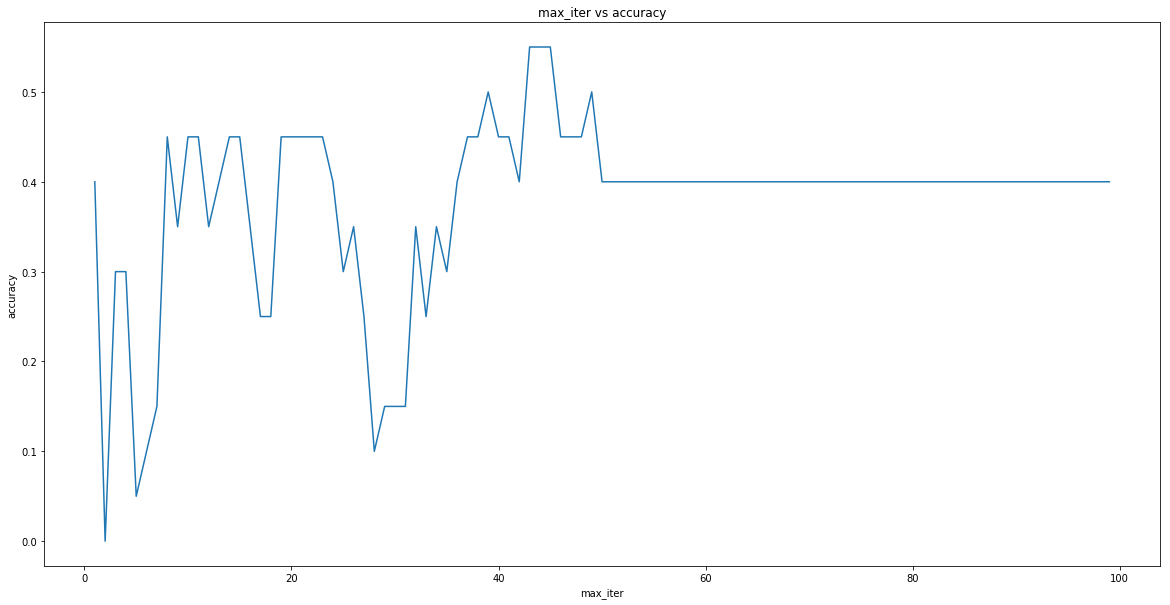

In [23]:
plt.figure(figsize=(20,10))
plt.plot(iter_, accuracy)
plt.ylabel("accuracy")
plt.xlabel("max_iter")
plt.title("max_iter vs accuracy")
plt.show()

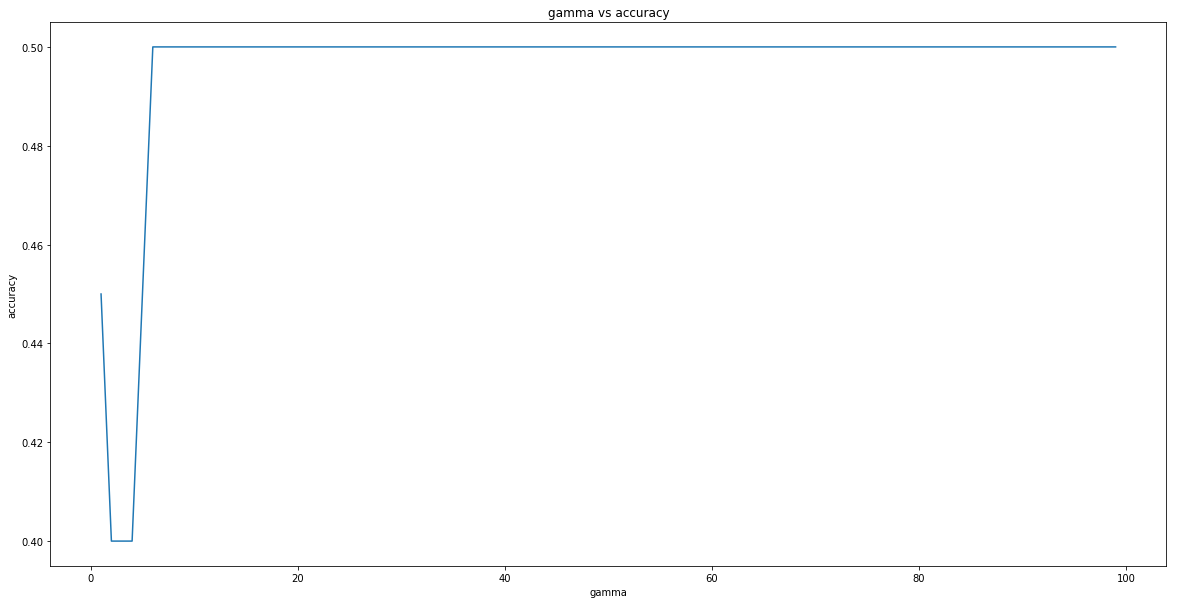

In [18]:
test_pred = [1]*10+[0]*10
gamma = range(1,100)
accuracy = []
for i in gamma:
    clf = SVC(gamma=i)
    clf.fit(x, y)                         # fit our train data into our classifier
    clf_pred = clf.predict(x_test)        # making prediction on test data
    count = 0
    for j in range(len(test_pred)):
        if clf_pred[j] == test_pred[j]:
            count += 1
    acc = count/20
    accuracy.append(acc)
plt.figure(figsize=(20,10))
plt.plot(iter_, accuracy)
plt.ylabel("accuracy")
plt.xlabel("gamma")
plt.title("gamma vs accuracy")
plt.show()